In [54]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# video read
cap = cv2.VideoCapture('matchHomography/monitoring_720p.avi')  # trainImage

# query image read
img1 = cv2.imread('matchHomography/monitoring_720p.avi_000001291.png', 0)  # queryImage

# select roi from img1
x, y, w, h = 581,137,53,49  # ROI에 맞게 조정
roi = img1[y:y+h, x:x+w]

# SIFT 검출기 초기화
sift = cv2.SIFT_create()

# img1에서 SIFT로 키포인트 및 디스크립터 찾기
kp1, des1 = sift.detectAndCompute(roi, None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

while True:
    # 비디오에서 프레임 읽기
    ret, img2 = cap.read()
    if not ret:
        break

    # 현재 프레임에서 SIFT로 키포인트 및 디스크립터 찾기
    kp2, des2 = sift.detectAndCompute(img2, None)

    # FLANN 매칭 수행
    matches = flann.knnMatch(des1, des2, k=2)

    # Lowe의 비율 테스트를 기반으로 좋은 매칭만 저장
    good = []
    for m, n in matches:
        if m.distance < 0.9 * n.distance:
            good.append(m)

    MIN_MATCH_COUNT = 10
    if len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matchesMask = mask.ravel().tolist()
        h, w = roi.shape
        pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
        dst = cv2.perspectiveTransform(pts, M)
        img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)
    else:
        print("충분한 매칭이 발견되지 않았습니다 - %d/%d" % (len(good), MIN_MATCH_COUNT))
        matchesMask = None

    # 매칭 시각화
    draw_params = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matchesMask, flags=2)
    img3 = cv2.drawMatches(roi, kp1, img2, kp2, good, None, **draw_params)
    
    # 프레임 표시
    cv2.imshow('Matching result', img3)

    # 'q' 키가 눌리면 루프 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 비디오 캡처 객체 해제
cap.release()

# 모든 OpenCV 창 닫기
cv2.destroyAllWindows()


충분한 매칭이 발견되지 않았습니다 - 9/10
충분한 매칭이 발견되지 않았습니다 - 9/10
충분한 매칭이 발견되지 않았습니다 - 9/10
충분한 매칭이 발견되지 않았습니다 - 9/10
충분한 매칭이 발견되지 않았습니다 - 10/10
충분한 매칭이 발견되지 않았습니다 - 9/10
충분한 매칭이 발견되지 않았습니다 - 9/10
충분한 매칭이 발견되지 않았습니다 - 8/10
충분한 매칭이 발견되지 않았습니다 - 9/10
충분한 매칭이 발견되지 않았습니다 - 7/10
충분한 매칭이 발견되지 않았습니다 - 6/10
충분한 매칭이 발견되지 않았습니다 - 8/10
충분한 매칭이 발견되지 않았습니다 - 9/10
충분한 매칭이 발견되지 않았습니다 - 9/10
충분한 매칭이 발견되지 않았습니다 - 8/10
충분한 매칭이 발견되지 않았습니다 - 8/10
충분한 매칭이 발견되지 않았습니다 - 8/10
충분한 매칭이 발견되지 않았습니다 - 9/10
충분한 매칭이 발견되지 않았습니다 - 9/10
충분한 매칭이 발견되지 않았습니다 - 9/10
충분한 매칭이 발견되지 않았습니다 - 6/10
충분한 매칭이 발견되지 않았습니다 - 7/10
충분한 매칭이 발견되지 않았습니다 - 7/10


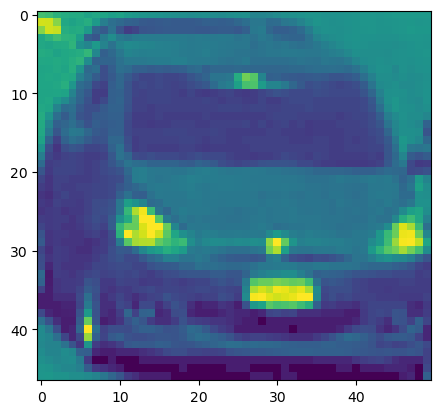

In [48]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

cap = cv2.VideoCapture('matchHomography/monitoring_720p.avi')  # trainImage

# query image read
img1 = cv2.imread('matchHomography/monitoring_720p.avi_000001291.png', 0)  # queryImage

# select roi from img1
x, y, w, h = 581,137,50,47 # ROI에 맞게 조정
roi = img1[y:y+h, x:x+w]
plt.imshow(roi)
plt.show()